## Import libraries and read tree from url

In [30]:
import requests

import matplotlib.pyplot as plt

from Bio import Phylo
from io import StringIO
from ete3 import Tree, NodeStyle, TreeStyle


link = "https://www.jasondavies.com/tree-of-life/life.txt"
tree = requests.get(link).text

# `Bio.Phylo`
## Parsing tree

In [31]:
phylo_tree = next(Phylo.parse(StringIO(tree), 'newick'))

## Draw tree in ASCII

In [32]:
Phylo.draw_ascii(phylo_tree)


                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

## Draw and save png/pdf tree

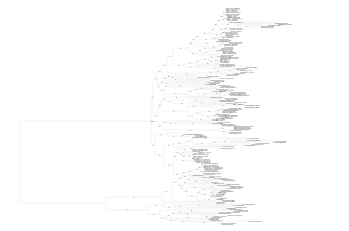

In [33]:
plt.rcParams.update({'font.size': 1, 'lines.linewidth': 0.05})
Phylo.draw(phylo_tree, do_show=False)
plt.axis('off')

plt.savefig('bio_phylo.png')
plt.savefig('bio_phylo.pdf')
plt.show()


## Changing the format to phyloxml and writing to the file

In [34]:
Phylo.convert(StringIO(tree), 'newick', 'tree.xml', 'phyloxml')


1

# `ETE toolkit`
## Parsing tree


In [35]:
t = Tree(tree, format=1)
leaves = t.get_leaves()[:42]
t.prune(leaves)

## Drawing the pruned tree

In [36]:
t.render("ete_tree.pdf")
pass

## Drawing the pruned tree with red dots against blue

In [37]:
nstyle = NodeStyle()
nstyle["fgcolor"] = "red"

for n in t.traverse():
   n.set_style(nstyle)

t.render("ete_tree2.pdf")
pass